In [ ]:
#The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. 
#The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import backend
import tensorflow as  tf

# Model architecture
from sklearn.model_selection import train_test_split

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D,MaxPool2D, Activation, MaxPooling2D
#from tensorflow.keras.layers.normalization import BatchNormalization
# 
from keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.constraints import maxnorm
# Data processing

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Progressor
#from tqdm import tqdm
#import h5py


In [187]:
# loading the dataset 
from tensorflow.keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

In [ ]:
y_train[0:1]

In [ ]:
type(y_train)

In [ ]:
#X_train1, X_test1 ,y_train1, y_test1 = train_test_split( X_train, y_train, test_size=0.20 ,stratify=True)
#y_train1, y_test1  = train_test_split( y_train, test_size=0.20 ,stratify=True)
#X, X_valid1, y, y_vaild1 = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
#X, X_valid1, y, y_vaild1 = train_test_split(X_train, test_size=0.2, random_state=1)
#y_train1, y_test1  = train_test_split( y_train, test_size=0.20 ,stratify=y_train)

In [188]:
X_train1, X_test1, y_train1, y_test1= train_test_split(X_train,y_train, test_size=0.2, random_state=1,stratify=y_train)
#y_train1, y_test1  = train_test_split( y_train, test_size=0.20 ,stratify=y_train)

In [ ]:
#Now i'am applying stratified sampling as :

#        train,test = train_test_split(dataset,test_size=0.20,stratify=True)
#s = pd.Series(data) 

In [ ]:
# X_train and y_train to put into another numpy 3 arrays such ,X_train to spilt into train1 , test1 and val1 .
# checking if after splitting data it has correctly loaded into three arrays or not.


In [ ]:
#X_train1= X_train[:40000,:]
#X_test1 = X_train[-10000:,:]
#X_train1= X_train[:40000,:]
#X_test1 = X_train[-10000:,:]

In [189]:
# summarize loaded dataset
print('X_train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('X_train1: X=%s, y=%s' % (X_train1.shape, y_train1.shape))
print('X_test1: X=%s, y=%s' % (X_test1.shape, y_test1.shape))

X_train: X=(50000, 32, 32, 3), y=(50000, 1)
X_train1: X=(40000, 32, 32, 3), y=(40000, 1)
X_test1: X=(10000, 32, 32, 3), y=(10000, 1)


In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train1[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train1[i][0]])
plt.show()

In [ ]:
y_test[0:2]

In [ ]:
# plot first few images
for i in range(5):
# define subplot
   plt.subplot(330 + 1 + i)
# plot raw pixel data
   plt.imshow(X_train1[i])
# show the figure
plt.show()

In [ ]:
# normalize pixel values
#X_train1, X_test1 = X_train1 / 255.0, X_test1 / 255.0
# Function to reshape and scaling image
def Scale_Reshape(x):
    x_min = x.min(axis=(1, 2), keepdims=True)
    x_max = x.max(axis=(1, 2), keepdims=True)

    x = (x - x_min)/(x_max-x_min)
    
    x = x.reshape(-1, 32, 32, 3)
    return x

In [ ]:
# Training data processing
X_train1_scale = Scale_Reshape(X_train1)

# Test data processing 
X_test1_scale = Scale_Reshape(X_test1)
#  actual test data scaling
# Test data processing 
X_test_scale = Scale_Reshape(X_test)

In [ ]:
# Show the histogram showing the frequency of data point in each class
# it shows in training set each class having 5k images  and test each class having 1k 
fig, axs = plt.subplots(1,3,figsize=(15,5)) 
# Count plot for training set
sns.countplot(y_train1.ravel(), ax=axs[0])
axs[0].set_title('frequency of data point in each class in train1')
axs[0].set_xlabel('Classes')

sns.countplot(y_test1.ravel(), ax=axs[1])
axs[1].set_title('frequency of data point in each class in test1')
axs[1].set_xlabel('Classes')

sns.countplot(y_test.ravel(), ax=axs[2])
axs[2].set_title('frequency of data point in each class in actual test')
axs[2].set_xlabel('Classes')

In [ ]:
# it shows in training set each class having 5k images  and test each class having 1k 
fig, axs = plt.subplots(1,2,figsize=(15,5)) 
# Count plot for training set
sns.countplot(y_train.ravel(), ax=axs[0])
axs[0].set_title('frequency of data point in each class in train')
axs[0].set_xlabel('Classes')

sns.countplot(y_test.ravel(), ax=axs[1])
axs[1].set_title('frequency of data point in each class in test')
axs[1].set_xlabel('Classes')



In [190]:
# normalize pixel values
X_train1 = X_train1.astype('float32')
X_test1 = X_test1.astype('float32')
X_train1, X_test1 = X_train1 / 255.0, X_test1 / 255.0

In [191]:
# Convert categorical values int one hot encoding .
#import keras
num_classes = 10
y_train1 = tf.keras.utils.to_categorical(y_train1, num_classes)
y_test1 = tf.keras.utils.to_categorical(y_test1, num_classes)

In [192]:
# now we will check with actuall test set for accuracy ( X_test and y_test)
# here one hot encoding for actual test data and scaling for actual test set 
# normalize pixel values
X_test = X_test.astype('float32')
X_test=  X_test / 255.0
# Convert categorical values int one hot encoding .
#import keras
num_classes = 10
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
#net is learning with 32 convolutional filters, each of which with a 3 x 3 size. 
#activation is relu and we have a max-pooling operation with pool size 2 x 2 and a dropout at 25%.

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
#model.add(Dropout(0.50))


In [202]:
reset model

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Don't know how to reset  model, please run `%reset?` for details


In [ ]:
#net is learning 128 convolutional filters, each of which with a 3 x 3 size.  
#folowed by another 128 convolutional filters, each of which with a 3 x 3 size and activation is also relu. 
#After that we have a avarage -pooling operation with pool size 2 x 2 and a dropout at 25%.

model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.AveragePooling2D((2, 2)))
model.add(Dropout(0.250))


In [ ]:
# Add Dense layers on top
# CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs,drop out  and a softmax activation.

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [203]:
    model = models.Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
    model.add(Dropout(0.2))
 
    model.add(Conv2D(32,(3,3),padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
 
    model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
    model.add(Dropout(0.2))
 
    model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
 
    model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
    model.add(Dropout(0.2))
 
    model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
 
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(1024,activation='relu',kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))

In [204]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_33 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_34 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 16, 16, 64)      

In [ ]:
number_of_round=60 ,
#batch_size = 32

In [200]:
# Compile and train the model and validation dataset and without any image augmentation
#opt = SGD(lr=0.01, momentum=0.9)
#optimizer=opt
model.compile(optimizer= 'adam',
#              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

#history = model.fit(X_train1, y_train1, epochs = 40, shuffle = True, batch_size = 64,
#                    validation_data=(X_test1, y_test1))
history = model.fit(X_train1, y_train1, epochs = 40,shuffle = True, batch_size = 32,
                     validation_split = 0.1)

Epoch 1/40
1125/1125 [==============================] - 18s 16ms/step - loss: 1.6599 - accuracy: 0.3865 - val_loss: 1.3473 - val_accuracy: 0.5120
Epoch 2/40
1125/1125 [==============================] - 18s 16ms/step - loss: 1.2362 - accuracy: 0.5561 - val_loss: 1.1588 - val_accuracy: 0.5790
Epoch 3/40
1125/1125 [==============================] - 18s 16ms/step - loss: 1.0461 - accuracy: 0.6280 - val_loss: 1.0191 - val_accuracy: 0.6407
Epoch 4/40
1125/1125 [==============================] - 18s 16ms/step - loss: 0.9136 - accuracy: 0.6747 - val_loss: 0.9135 - val_accuracy: 0.6795
Epoch 5/40
1125/1125 [==============================] - 18s 16ms/step - loss: 0.8281 - accuracy: 0.7061 - val_loss: 0.8425 - val_accuracy: 0.7015
Epoch 6/40
1125/1125 [==============================] - 18s 16ms/step - loss: 0.7591 - accuracy: 0.7290 - val_loss: 0.8238 - val_accuracy: 0.7100
Epoch 7/40
1125/1125 [==============================] - 18s 16ms/step - loss: 0.7107 - accuracy: 0.7479 - val_loss: 0.7820 -

In [206]:
# with test1 dataset 
model.compile(optimizer= 'adam',
#              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train1, y_train1, epochs = 35, shuffle = True, batch_size = 32,
                   validation_data=(X_test1, y_test1))

Epoch 1/35
1250/1250 [==============================] - 22s 18ms/step - loss: 1.0832 - accuracy: 0.6141 - val_loss: 0.9667 - val_accuracy: 0.6563
Epoch 2/35
1250/1250 [==============================] - 21s 17ms/step - loss: 0.9398 - accuracy: 0.6661 - val_loss: 0.8709 - val_accuracy: 0.6921
Epoch 3/35
1250/1250 [==============================] - 22s 17ms/step - loss: 0.8273 - accuracy: 0.7068 - val_loss: 0.8363 - val_accuracy: 0.7080
Epoch 4/35
1250/1250 [==============================] - 21s 17ms/step - loss: 0.7568 - accuracy: 0.7328 - val_loss: 0.7649 - val_accuracy: 0.7297
Epoch 5/35
1250/1250 [==============================] - 21s 17ms/step - loss: 0.7017 - accuracy: 0.7540 - val_loss: 0.7984 - val_accuracy: 0.7296
Epoch 6/35
1250/1250 [==============================] - 21s 17ms/step - loss: 0.6566 - accuracy: 0.7681 - val_loss: 0.7135 - val_accuracy: 0.7525
Epoch 7/35
1250/1250 [==============================] - 21s 17ms/step - loss: 0.6151 - accuracy: 0.7854 - val_loss: 0.7303 -

In [211]:
# with actaul test dataset

model = models.Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Dropout(0.2))
 
model.add(Conv2D(32,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
 
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Dropout(0.2))
 
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
 
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(Dropout(0.2))
 
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
 
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer= 'adam',
#              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train1, y_train1, epochs = 35, shuffle = True, batch_size = 32,
                   validation_data=(X_test, y_test))

Epoch 1/35
1250/1250 [==============================] - 22s 17ms/step - loss: 1.6211 - accuracy: 0.3999 - val_loss: 1.3261 - val_accuracy: 0.5157
Epoch 2/35
1250/1250 [==============================] - 21s 17ms/step - loss: 1.1800 - accuracy: 0.5756 - val_loss: 1.0680 - val_accuracy: 0.6200
Epoch 3/35
1250/1250 [==============================] - 21s 17ms/step - loss: 1.0086 - accuracy: 0.6406 - val_loss: 1.0152 - val_accuracy: 0.6427
Epoch 4/35
1250/1250 [==============================] - 21s 17ms/step - loss: 0.8920 - accuracy: 0.6868 - val_loss: 0.8371 - val_accuracy: 0.7089
Epoch 5/35
1250/1250 [==============================] - 22s 17ms/step - loss: 0.8065 - accuracy: 0.7159 - val_loss: 0.8138 - val_accuracy: 0.7139
Epoch 6/35
1250/1250 [==============================] - 21s 17ms/step - loss: 0.7417 - accuracy: 0.7377 - val_loss: 0.7968 - val_accuracy: 0.7228
Epoch 7/35
1250/1250 [==============================] - 21s 17ms/step - loss: 0.6897 - accuracy: 0.7561 - val_loss: 0.7722 -

In [216]:
model = models.Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Dropout(0.2))
 
model.add(Conv2D(32,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
 
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Dropout(0.2))
 
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
 
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(Dropout(0.2))
 
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
 
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer= 'adam',
#              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [209]:
reset model

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Don't know how to reset  model, please run `%reset?` for details


In [ ]:
# Evaluate the model
test_loss1, test_acc1 = model.evaluate(X_test1,  y_test1, verbose=2)

In [ ]:
predicted_classes = model.predict_classes(X_test1) 
predicted_classes

In [ ]:
# plotting model train and test accuracy 
def plotmodel(hist): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['Train1', 'Test1'], loc='upper left')
    # loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['Train1', 'Test1'], loc='upper left')
    plt.show()

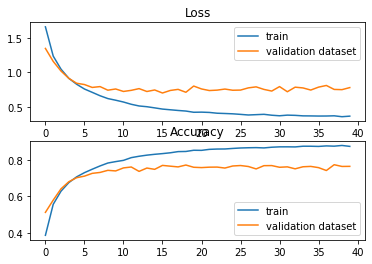

In [201]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation dataset')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation dataset')
plt.legend()
plt.show()

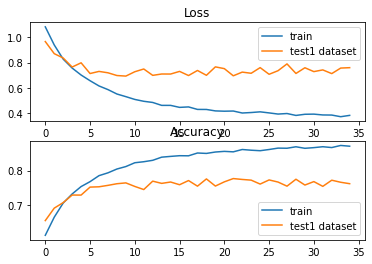

In [207]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test1 dataset')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test1 dataset')
plt.legend()
plt.show()

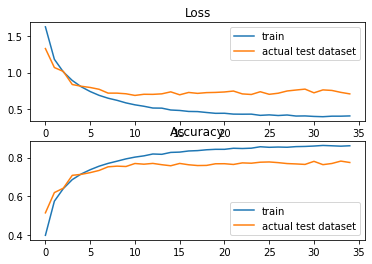

In [212]:
 # plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='actual test dataset')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='actual test dataset')
plt.legend()
plt.show()

In [ ]:
# printing , below graph shows overfitting train accuracy good but test accuracy down ,difference is there 
print(history.history.keys())

plotmodel(history)

In [ ]:
# MODEL Training using data augmentaion 

In [213]:
# generating more data using the existing data
#Randomly Zoom by 10% some training images
#Randomly shift images horizontally by 10% of the width
#Randomly shift images vertically by 10% of the height
#Randomly flip images horizontally.
#from tf.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zca_epsilon=0,
                            #width_shift_range = 0.1,
                            horizontal_flip = True,
                            fill_mode='reflect',
                            )
    
#datagen.fit(X_train1)



In [ ]:
test_generator = ImageDataGenerator(zca_epsilon=0,
                               horizontal_flip=True,
                               fill_mode='reflect',)
#test_generator.fit(X_test1, seed=0, augment=True)

In [215]:
reset model

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Don't know how to reset  model, please run `%reset?` for details


In [219]:
# retraining the model

#history = model.fit_generator(datagen.flow(X_train1, y_train1, batch_size = 32), epochs = 10, validation_data=(X_test1, y_test1))
#                                    workers=4)
# get batch iterator for training
train_iterator = datagen.flow(X_train1, y_train1)
# get batch iterator for test1
val_iterator = datagen.flow(X_test1, y_test1)
# fit model
history = model.fit_generator(train_iterator, validation_data=val_iterator, epochs = 30)

Epoch 1/30
1250/1250 [==============================] - 22s 18ms/step - loss: 1.6503 - accuracy: 0.3924 - val_loss: 1.3075 - val_accuracy: 0.5291
Epoch 2/30
1250/1250 [==============================] - 21s 17ms/step - loss: 1.2342 - accuracy: 0.5546 - val_loss: 1.1097 - val_accuracy: 0.5969
Epoch 3/30
1250/1250 [==============================] - 21s 17ms/step - loss: 1.0602 - accuracy: 0.6222 - val_loss: 0.9666 - val_accuracy: 0.6543
Epoch 4/30
1250/1250 [==============================] - 21s 17ms/step - loss: 0.9518 - accuracy: 0.6633 - val_loss: 0.8978 - val_accuracy: 0.6809
Epoch 5/30
1250/1250 [==============================] - 22s 18ms/step - loss: 0.8822 - accuracy: 0.6902 - val_loss: 0.9063 - val_accuracy: 0.6754
Epoch 6/30
1250/1250 [==============================] - 22s 17ms/step - loss: 0.8247 - accuracy: 0.7104 - val_loss: 0.7705 - val_accuracy: 0.7305
Epoch 7/30
1250/1250 [==============================] - 22s 17ms/step - loss: 0.7815 - accuracy: 0.7262 - val_loss: 0.7552 -

In [222]:
# Evaluate the model for test data
#test_loss, test_acc = model.evaluate(X_test1,  y_test1, verbose=2)
# get batch iterator for testing
test_iterator = datagen.flow(X_test, y_test)
# evaluate model loss on test dataset
test_loss, test_acc = model.evaluate_generator(test_iterator, verbose=2)

313/313 - 2s - loss: 0.6334 - accuracy: 0.7853


In [ ]:
# printing , below graph shows overfitting train accuracy good but test accuracy down ,difference is there 
print(history.history.keys())
plotmodel(history)

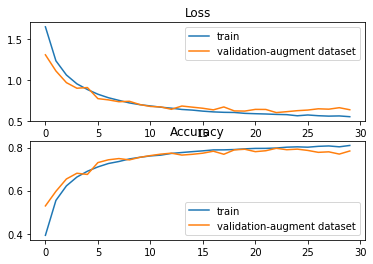

In [220]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation-augment dataset')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation-augment dataset')
plt.legend()
plt.show()

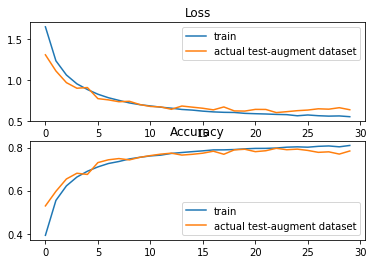

In [223]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='actual test-augment dataset')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='actual test-augment dataset')
plt.legend()
plt.show()